<h1 style="
    background-color:Black; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: black">
    ML Housing Project
</h1>

# Table of Contents <a class="anchor" id="toc"></a>

* [Downloading the data](#iris)

<h1 style="
    background-color:dodgerblue; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: dodgerblue">
    Problem > Data > Analysis > Model > Conclusions
</h1>

<a class="anchor" id="Distributions"></a>

<h1 style="
    background-color:dodgerblue; 
    color:White;
    font-size: 30px;
    padding: 2px;
    border-style: solid;
    border-width: 2px 2px;
    border-color: dodgerblue">
    Distributions
</h1>

[Back to TOC](#toc)

In [1]:
import os
import tarfile
import urllib
import missingno as msno
import numpy as np
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
print(HOUSING_URL)

https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

In [6]:
housing['ocean_proximity'] = housing['ocean_proximity'].astype('category')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

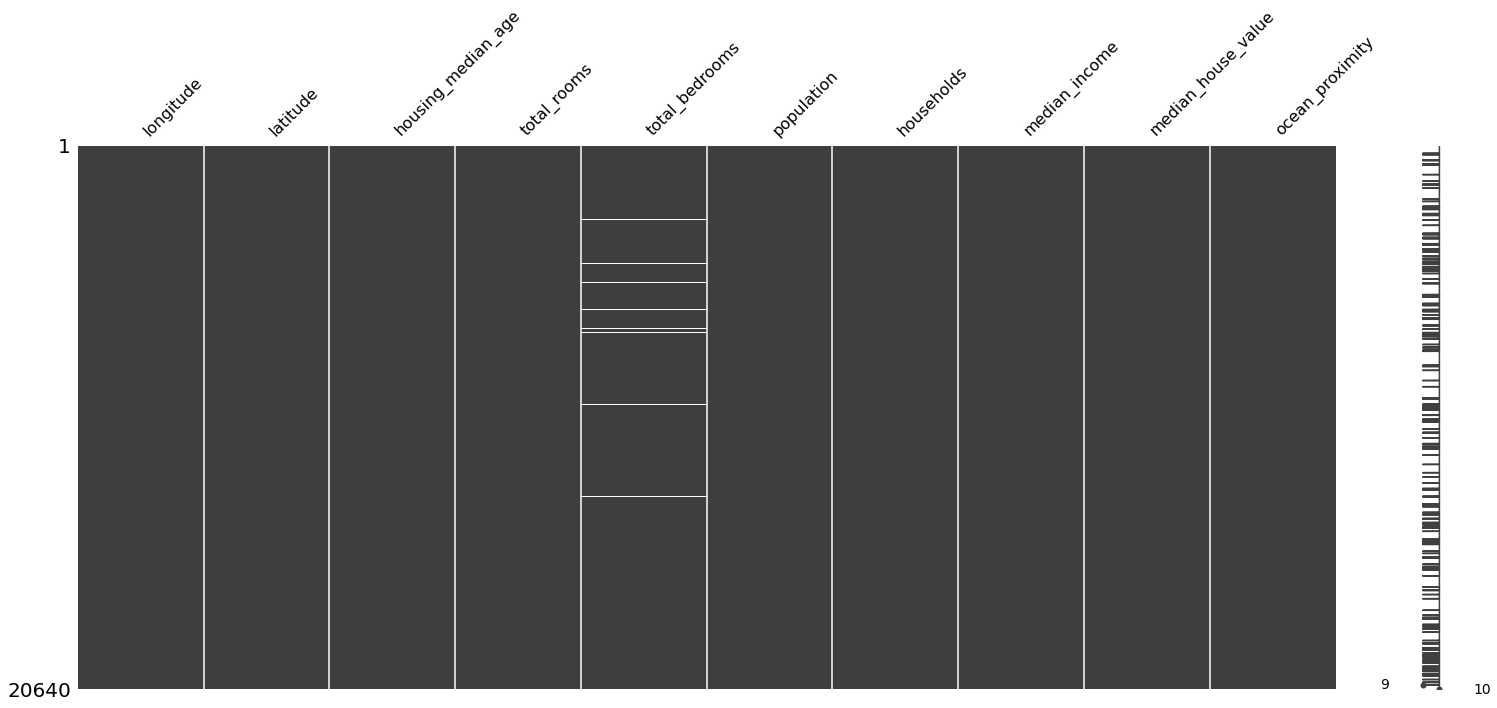

In [10]:
msno.matrix(housing)

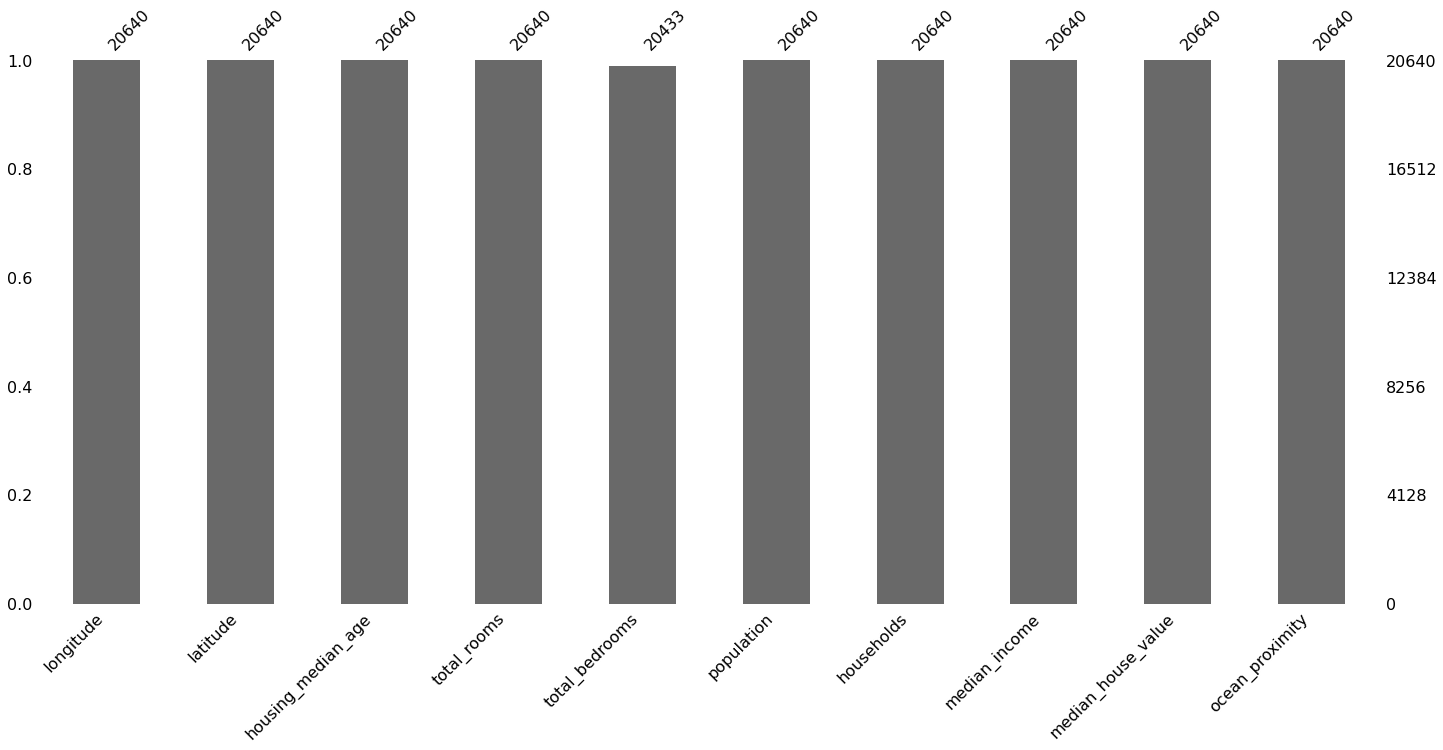

In [11]:
p=msno.bar(housing)

In [12]:
import sys  

sys.path.insert(0, '/Users/christian/Documents/GitHub/custom made libraries/EDA/initial_analysis')
import custom_functions
from custom_functions import missing_values_table, describe_num_cat, histplot, scatter_matrix

In [13]:
from inspect import getmembers, isfunction
x = getmembers(custom_functions, isfunction)
list_values = pd.DataFrame(x)

list_values.columns = [str(column) for column in list_values.columns]
list_values = list_values.drop(columns=['1'])
print(list_values)

                      0
0      describe_num_cat
1              histplot
2  missing_values_table
3        scatter_matrix


In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

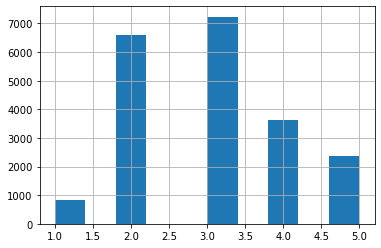

In [15]:
housing["income_cat"].hist()

In [16]:
missing_values = missing_values_table(housing_sample)
missing_values.style.background_gradient(cmap='Reds')

NameError: name 'housing_sample' is not defined

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

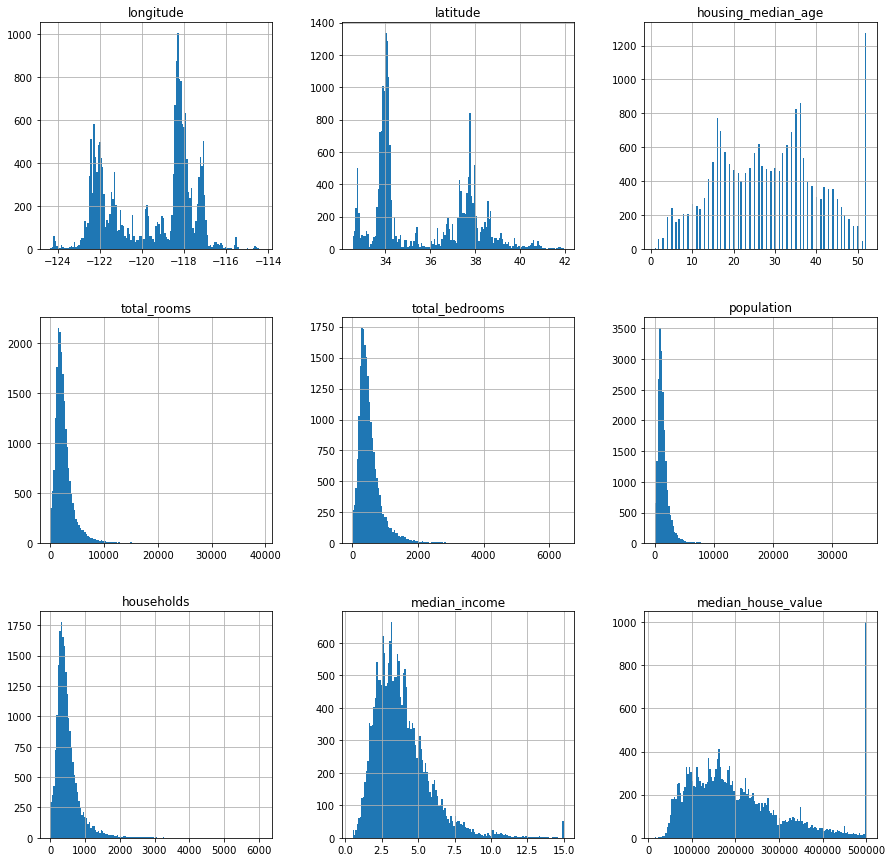

In [31]:
binsize = int(np.sqrt(len(housing.index)))

housing.hist(figsize=(15, 15), bins = binsize)

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [19]:
scatter_matrix(housing,housing.median_house_value,"title")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

array([[<AxesSubplot:title={'center':'households'}, xlabel='[ocean_proximity]'>,
        <AxesSubplot:title={'center':'housing_median_age'}, xlabel='[ocean_proximity]'>,
        <AxesSubplot:title={'center':'latitude'}, xlabel='[ocean_proximity]'>],
       [<AxesSubplot:title={'center':'longitude'}, xlabel='[ocean_proximity]'>,
        <AxesSubplot:title={'center':'median_house_value'}, xlabel='[ocean_proximity]'>,
        <AxesSubplot:title={'center':'median_income'}, xlabel='[ocean_proximity]'>],
       [<AxesSubplot:title={'center':'population'}, xlabel='[ocean_proximity]'>,
        <AxesSubplot:title={'center':'total_bedrooms'}, xlabel='[ocean_proximity]'>,
        <AxesSubplot:title={'center':'total_rooms'}, xlabel='[ocean_proximity]'>]],
      dtype=object)

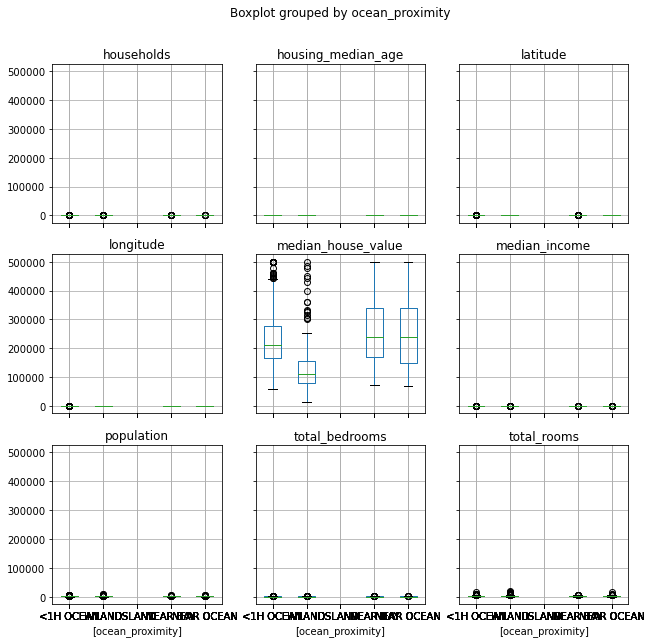

In [41]:
housing_sample.boxplot(by="ocean_proximity", figsize=(10, 10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'housing')

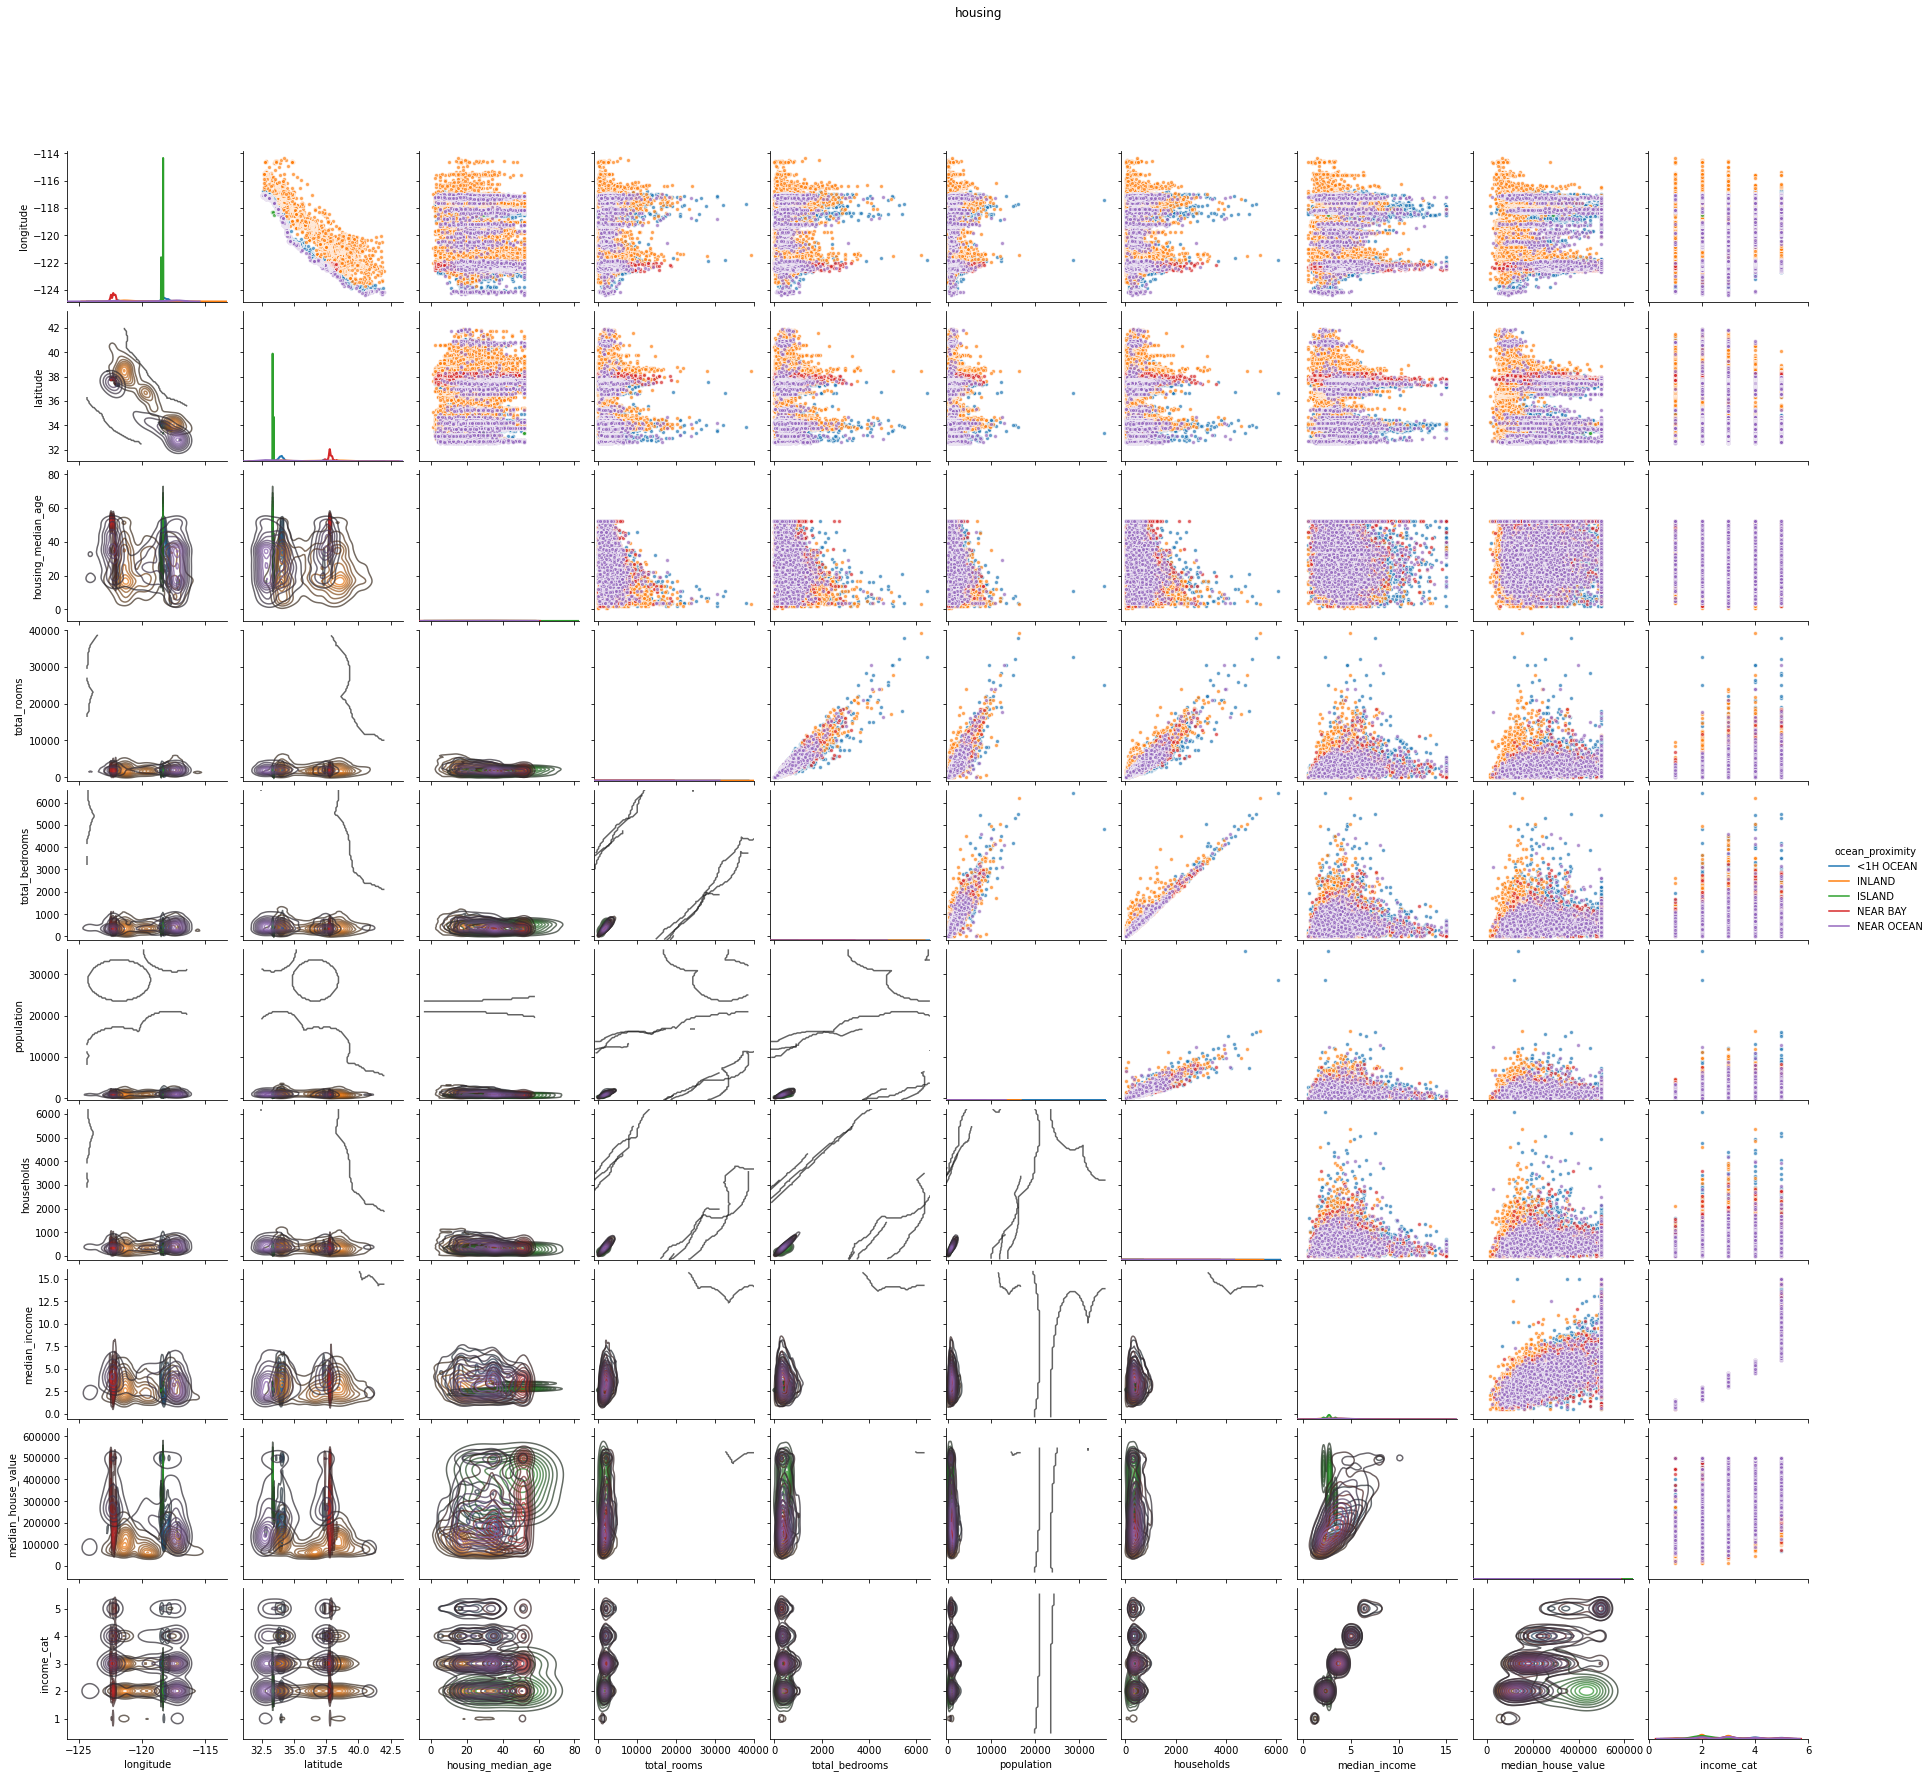

In [21]:
g = sns.PairGrid(housing, hue="ocean_proximity",diag_sharey=True)

g.map_upper(sns.scatterplot, s=15, alpha=0.7)
g.map_lower(sns.kdeplot, alpha=0.7)
g.map_diag(sns.kdeplot, lw=2)
g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('housing')